In [1]:
import torch
from PIL import Image

from lavis.models import load_model_and_preprocess

#### Load an example image

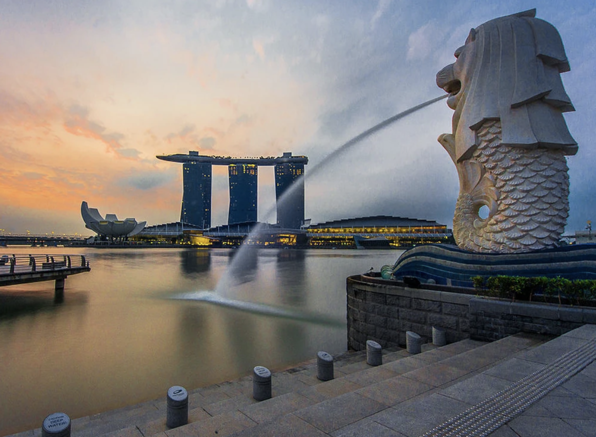

In [2]:
raw_image = Image.open("../docs/_static/merlion.png").convert("RGB")
display(raw_image.resize((596, 437)))

In [3]:
# setup device to use
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#### Load BLIP large captioning model finetuned on COCO

In [4]:
# we associate a model with its preprocessors to make it easier for inference.
model, vis_processors, _ = load_model_and_preprocess(
    name="blip_caption", model_type="large_coco", is_eval=True, device=device
)
# uncomment to use base model
# model, vis_processors, _ = load_model_and_preprocess(
#     name="blip_caption", model_type="base_coco", is_eval=True, device=device
# )
vis_processors.keys()

dict_keys(['train', 'eval'])

#### prepare the image as model input using the associated processors

In [5]:
image = vis_processors["eval"](raw_image).unsqueeze(0).to(device)

#### generate caption using beam search

In [6]:
model.generate({"image": image})

['a large statue of a person spraying water from a fountain']

#### generate multiple captions using nucleus sampling

In [7]:
# due to the non-determinstic nature of necleus sampling, you may get different captions.
model.generate({"image": image}, use_nucleus_sampling=True, num_captions=3)

['there is a large body of water with a giant statue',
 'the statue is spewing water from a fountain on the river',
 'there are many fountains that come into the river']